In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import json
# Always make it pretty.
plt.style.use('ggplot')
# Requests sends and recieves HTTP requests.
import requests

# Beautiful Soup parses HTML documents in python.
from bs4 import BeautifulSoup
import datetime

In [2]:
file = pd.read_csv('data/Collisions.csv')

In [3]:
infl = file[((file['UNDERINFL'] == 'Y') & (file['FATALITIES'] > 0) )| ((file['UNDERINFL'] == '1') & (file['FATALITIES'] > 0))].shape[0]
drunkdracc = file[((file['UNDERINFL'] == 'Y') | (file['UNDERINFL'] == '1'))].shape[0]
print('percentage of drunk driving accidents that result in a death: ',(100*infl/drunkdracc))

nondrunkdrivingacccsdeath = file[((file['UNDERINFL'] == 'N') & (file['FATALITIES'] > 0) )| ((file['UNDERINFL'] == '0') & (file['FATALITIES'] > 0))].shape[0]
nondrunkdrivingacc = file[(file['UNDERINFL'] == 'N') | (file['UNDERINFL'] == '0')].shape[0]
print('percentage of NON-drunk driving accidents that result in a death: ',(100*nondrunkdrivingacccsdeath/nondrunkdrivingacc))


percentage of drunk driving accidents that result in a death:  0.966183574879227
percentage of NON-drunk driving accidents that result in a death:  0.12671202018381691


In [4]:
seriousinjury = file[((file['UNDERINFL'] == 'Y') & (file['SERIOUSINJURIES'] > 0) )| ((file['UNDERINFL'] == '1') & (file['SERIOUSINJURIES'] > 0))].shape[0]
print('percentage of drunk driving accidents that result in serioius injuries: ',100*seriousinjury/drunkdracc)

seriousinjurynondrunk = file[((file['UNDERINFL'] == 'N') & (file['SERIOUSINJURIES'] > 0) )| ((file['UNDERINFL'] == '0') & (file['SERIOUSINJURIES'] > 0))].shape[0]
print('percentage of NON-drunk driving accidents that result in serious injuries: ',100* seriousinjurynondrunk/nondrunkdrivingacc)

percentage of drunk driving accidents that result in serioius injuries:  4.487385936661299
percentage of NON-drunk driving accidents that result in serious injuries:  1.4276220940710038


In [5]:
injurydrunk = file[((file['UNDERINFL'] == 'Y') & (file['INJURIES'] > 0) )| ((file['UNDERINFL'] == '1') & (file['INJURIES'] > 0))].shape[0]
injurynondrunk = file[((file['UNDERINFL'] == 'N') & (file['INJURIES'] > 0) )| ((file['UNDERINFL'] == '0') & (file['INJURIES'] > 0))].shape[0]
print('percentage of drunk driving accidents that result in injuries',injurydrunk/drunkdracc*100)
print('percentage of NON-drunk driving accidents that result in injuries',injurynondrunk/nondrunkdrivingacc*100)

percentage of drunk driving accidents that result in injuries 41.82501341921632
percentage of NON-drunk driving accidents that result in injuries 30.51563344746801


In [6]:
file['ST_COLCODE'] = pd.to_numeric(file['ST_COLCODE'],errors = 'coerce')
pedestrianfatalties = ((file['FATALITIES'] > 0) & (file['ST_COLCODE'] >= 0) & (file['ST_COLCODE'] <= 5)).sum()
nonpedestrianfatalities = ((file['FATALITIES'] > 0) & (file['ST_COLCODE'] >= 10)).sum()
fatalities = (file['FATALITIES'] > 0).sum()
print('percentage of fatalities that involve a pedestrian: ',pedestrianfatalties/fatalities*100)

pedstrianserious = ((file['SERIOUSINJURIES'] > 0) & (file['ST_COLCODE'] >= 0) & (file['ST_COLCODE'] <= 5)).sum()
serioustotal = (file['SERIOUSINJURIES'] > 0).sum()
print('percentage of serious injuries that involve a pedestrian: ',pedstrianserious/serioustotal*100)

pedestrianinjuries =((file['INJURIES'] > 0) & (file['ST_COLCODE'] >= 0) & (file['ST_COLCODE'] <= 5)).sum()
injuriestotal = (file['INJURIES'] > 0).sum()
print('percentage of injuries that involve a pedestrian: ',pedestrianinjuries/injuriestotal*100)

percentage of fatalities that involve a pedestrian:  35.0609756098
percentage of serious injuries that involve a pedestrian:  28.1895093063
percentage of injuries that involve a pedestrian:  11.3598435683


In [7]:
file2 = file.copy()

In [9]:
file2.to_pickle('data/CollionsWDatetime.pkl.bz2', compression = 'bz2')

In [8]:
def datetimeconversion(row):
    try:
        return datetime.datetime.strptime(row['INCDTTM'],'%m/%d/%Y %I:%M:%S %p')
    except:
        return datetime.datetime.strptime(row['INCDTTM'],'%m/%d/%Y')

In [9]:
file2['INCDTTM']=file2.apply(datetimeconversion, axis=1)

In [10]:
def getweather():
    url = 'https://api.darksky.net/forecast/'
    with open('data/dark_sky.txt', 'r') as file:
        key = file.read()
    latlong = '/47.44472,-122.31361,'
    for i in range(5683): #5682 is number of days from beg to end
        time = 1389346020 + (i*24*60*60)
        strtime = str(time)
        finalurl= url+key+latlong+strtime
        r = requests.get(finalurl)
        dic = json.loads(r.content)
        Weather.insert_one(dic)
 
    

In [11]:
from pymongo import MongoClient
import pprint

In [12]:
client = MongoClient('localhost', 27017)
db = client['WeatherDB']
Weather = db['Weather']

In [13]:
Weather.find_one()

{'_id': ObjectId('5d781b8d4cadcc23e8d2595a'),
 'currently': {'apparentTemperature': 41.78,
  'cloudCover': 0.75,
  'dewPoint': 42.8,
  'humidity': 0.9,
  'icon': 'partly-cloudy-night',
  'precipIntensity': 0,
  'precipProbability': 0,
  'pressure': 1012.59,
  'summary': 'Mostly Cloudy',
  'temperature': 45.55,
  'time': 1389346020,
  'uvIndex': 0,
  'visibility': 10,
  'windBearing': 202,
  'windGust': 15.46,
  'windSpeed': 7.1},
 'daily': {'data': [{'apparentTemperatureHigh': 46.95,
    'apparentTemperatureHighTime': 1389394800,
    'apparentTemperatureLow': 39.39,
    'apparentTemperatureLowTime': 1389456000,
    'apparentTemperatureMax': 51.81,
    'apparentTemperatureMaxTime': 1389423600,
    'apparentTemperatureMin': 41.71,
    'apparentTemperatureMinTime': 1389348000,
    'cloudCover': 0.96,
    'dewPoint': 42.57,
    'humidity': 0.85,
    'icon': 'rain',
    'moonPhase': 0.35,
    'precipIntensity': 0.0048,
    'precipIntensityMax': 0.03,
    'precipIntensityMaxTime': 1389409200

In [14]:
def getprecipitation(info):
    times = info.find({})
    info = dict()
    for time in times:
        for i in range(len(time['hourly']['data'])):
            t = time['hourly']['data'][i]['time']
            try: 
                rain = time['hourly']['data'][i]['precipIntensity']
            except:
                continue
            dt = datetime.datetime.utcfromtimestamp(t)-datetime.timedelta(hours=8)
            info[dt] = rain
    return info

In [15]:
rain = getprecipitation(Weather)
rainpd = pd.DataFrame.from_dict(rain, orient='index')

In [16]:
def thirtysixhoursofnorain(df,num):
    count = 0
    lst = []
    for i, index in zip(range(df.size),df.index):
        if df.iloc[i,0] == 0:
            count += 1
        if df.iloc[i,0] != 0:
            if count >= num:
                lst.append(index)
            count = 0
    return lst
def getrainlist(df,num,level):
    count = 0
    lst = []
    for i, index in zip(range(df.size),df.index):
        if df.iloc[i,0] > level:
            count += 1
        if df.iloc[i,0] <= level:
            if count >= num:
                lst.append(index)
            count = 0
    return lst

In [17]:
thirtysixhourlst = thirtysixhoursofnorain(rainpd,36)

In [18]:
fourhourswetaccidentlst = getrainlist(rainpd,4,0)

In [19]:
fourOonehoursweaccidentlst = getrainlist(rainpd,4,.03)

In [20]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df

In [21]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

In [22]:
def getaccidentdict(df,lst,timeback):
    diction = dict()    
    df = df[df['INCDTTM'].dt.time != datetime.time(0,0)]
    for i in lst:
        accidents = ((df['INCDTTM']< i.to_pydatetime() - datetime.timedelta(hours=timeback)) & 
                        (df['INCDTTM']>= i.to_pydatetime()- datetime.timedelta(hours=timeback+1))).sum()
        if accidents > 0:
            diction[i.to_pydatetime()] = accidents
    return diction

def severitywetaccidentsdict(df,lst,kind,timeback):
    diction = dict()
    dictionary = dict()
    count = 0
    df = df[df['INCDTTM'].dt.time != datetime.time(0,0)]
    for i in lst:
        accidents = ((df['INCDTTM']>= i.to_pydatetime()-datetime.timedelta(hours=timeback+1)) & 
                          (df['INCDTTM']< i.to_pydatetime()-datetime.timedelta(hours=timeback)) & (df[kind] > 0)).sum()
        if accidents > 0:
            diction[i.to_pydatetime()] = accidents
            count += df[(df['INCDTTM']>= i.to_pydatetime()-datetime.timedelta(hours=timeback+1)) & 
                          (df['INCDTTM']< i.to_pydatetime()-datetime.timedelta(hours=timeback)) & (df[kind] > 0)].loc[:,kind].sum()
            dictionary[i.to_pydatetime()] = count
            count = 0
    return (diction, dictionary)

In [23]:
wetfourhourinjuriesdict = severitywetaccidentsdict(file2,fourhourswetaccidentlst,'INJURIES',0)
wetfourhourseriousinjuriesdict = severitywetaccidentsdict(file2,fourhourswetaccidentlst,'SERIOUSINJURIES',0)
wetfourhourifatalitiesdict = severitywetaccidentsdict(file2,fourhourswetaccidentlst,'FATALITIES',0)

In [24]:
print('WET FOR 3 OR MORE CONSECUTIVE HOURS')
print('Regular injuries below')
print('number of accidents',sum(wetfourhourinjuriesdict[0].values()))
print('number of injuries' , sum(wetfourhourinjuriesdict[1].values()))
wetfourhoursinjuriesnuminjuries = list(wetfourhourinjuriesdict[1].values())
#print('AVG accidents with injuries:', sum(wetfourhoursinjuriesnuminjuries)/len(wetfourhoursinjuriesnuminjuries))
print('Serious Injuries Below')
print('number of accidents',sum(wetfourhourseriousinjuriesdict[0].values()))
print('number of injuries' ,sum(wetfourhourseriousinjuriesdict[1].values()))
print('Fatalities Below')
print('number of accidents',sum(wetfourhourifatalitiesdict[0].values()))
print('number of injuries' ,sum(wetfourhourifatalitiesdict[1].values()))

WET FOR 3 OR MORE CONSECUTIVE HOURS
Regular injuries below
number of accidents 244
number of injuries 313
Serious Injuries Below
number of accidents 15
number of injuries 17
Fatalities Below
number of accidents 0
number of injuries 0


In [25]:
wetthirtysixhoursdict = severitywetaccidentsdict(file2,thirtysixhourlst,'INJURIES',-1)
wetthirtysixhoursdictseriousinjury = severitywetaccidentsdict(file2,thirtysixhourlst,'SERIOUSINJURIES',-1)
wetthirtysixhoursdictfatalities = severitywetaccidentsdict(file2,thirtysixhourlst,'FATALITIES',-1)

In [26]:
print('DRY FOR 36 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET')
print('Regular injuries below')
print('number of accidents',sum(wetthirtysixhoursdict[0].values()))
print('number of injuries' , sum(wetthirtysixhoursdict[1].values()))
wetthirtysixinjuriesnuminjuries = list(wetthirtysixhoursdict[1].values())
#print('AVG accidents with injuries:', sum(wetthirtysixinjuriesnuminjuries)/len(wetthirtysixinjuriesnuminjuries))
print('Serious Injuries Below')
print('number of accidents',sum(wetthirtysixhoursdictseriousinjury[0].values()))
print('number of injuries' ,sum(wetthirtysixhoursdictseriousinjury[1].values()))
print('Fatalities Below')
print('number of accidents',sum(wetthirtysixhoursdictfatalities[0].values()))
print('number of injuries' ,sum(wetthirtysixhoursdictfatalities[1].values()))

DRY FOR 36 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET
Regular injuries below
number of accidents 150
number of injuries 206
Serious Injuries Below
number of accidents 5
number of injuries 5
Fatalities Below
number of accidents 1
number of injuries 1


In [27]:
drythirtysixhourdict = severitywetaccidentsdict(file2,thirtysixhourlst,'INJURIES',2)
drythirtysixhourdictseriousinjuries = severitywetaccidentsdict(file2,thirtysixhourlst,'SERIOUSINJURIES',2)
drythirtysixhourdictfatalities = severitywetaccidentsdict(file2,thirtysixhourlst,'FATALITIES',2)

In [28]:
print('DRY FOR 34 OR MORE CONSECUTIVE HOURS')
print('Regular injuries below')
print('number of accidents',sum(drythirtysixhourdict[0].values()))
print('number of injuries' , sum(drythirtysixhourdict[1].values()))
drythirtysixnuminjuries = list(drythirtysixhourdict[1].values())
#print('AVG accidents with injuries:', sum(drythirtysixnuminjuries)/len(drythirtysixnuminjuries))
print('Serious Injuries Below')
print('number of accidents',sum(drythirtysixhourdictseriousinjuries[0].values()))
print('number of injuries' ,sum(drythirtysixhourdictseriousinjuries[1].values()))
print('Fatalities Below')
print('number of accidents',sum(drythirtysixhourdictfatalities[0].values()))
print('number of injuries' ,sum(drythirtysixhourdictfatalities[1].values()))

DRY FOR 34 OR MORE CONSECUTIVE HOURS
Regular injuries below
number of accidents 109
number of injuries 150
Serious Injuries Below
number of accidents 3
number of injuries 3
Fatalities Below
number of accidents 0
number of injuries 0


In [29]:
wetfourOonehourinjuriesdict = severitywetaccidentsdict(file2,fourOonehoursweaccidentlst,'INJURIES',0)
wetfourOoneseriousinjuriesdict = severitywetaccidentsdict(file2,fourOonehoursweaccidentlst,'SERIOUSINJURIES',0)
wetfourOonehourifatalitiesdict = severitywetaccidentsdict(file2,fourOonehoursweaccidentlst,'FATALITIES',0)

In [30]:
print('WET FOR 3 OR MORE CONSECUTIVE HOURS BUT MORE HEAVY RAIN')
print('Regular injuries below')
print('number of accidents',sum(wetfourOonehourinjuriesdict[0].values()))
print('number of injuries' , sum(wetfourOonehourinjuriesdict[1].values()))
wetfourOonehoursinjuries = list(wetfourOonehourinjuriesdict[1].values())
#print('AVG accidents with injuries:',sum(wetfourOonehoursinjuries)/len(wetfourOonehoursinjuries))
print('Serious Injuries Below')
print('number of accidents',sum(wetfourOoneseriousinjuriesdict[0].values()))
print('number of injuries' ,sum(wetfourOoneseriousinjuriesdict[1].values()))
print('Fatalities Below')
print('number of accidents',sum(wetfourOonehourifatalitiesdict[0].values()))
print('number of injuries' ,sum(wetfourOonehourifatalitiesdict[1].values()))

WET FOR 3 OR MORE CONSECUTIVE HOURS BUT MORE HEAVY RAIN
Regular injuries below
number of accidents 74
number of injuries 91
Serious Injuries Below
number of accidents 2
number of injuries 2
Fatalities Below
number of accidents 0
number of injuries 0


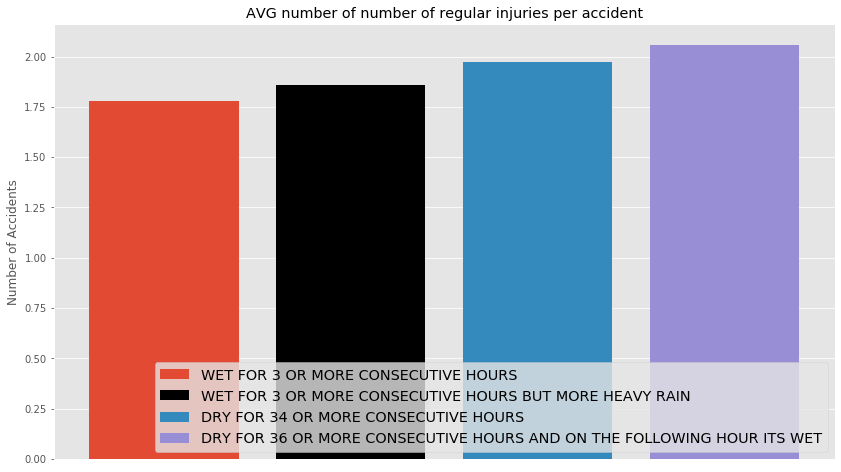

In [36]:
fig, ax = plt.subplots(1, figsize=(14, 8))
ax.bar(1,np.mean(wetfourhoursinjuriesnuminjuries),label='WET FOR 3 OR MORE CONSECUTIVE HOURS')
ax.bar(2,np.mean(wetfourOonehoursinjuries),color='black',label='WET FOR 3 OR MORE CONSECUTIVE HOURS BUT MORE HEAVY RAIN')
ax.bar(3,np.mean(drythirtysixnuminjuries),label='DRY FOR 34 OR MORE CONSECUTIVE HOURS')
ax.bar(4,np.mean(wetthirtysixinjuriesnuminjuries),label='DRY FOR 36 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET')
ax.set_title('AVG number of number of regular injuries per accident')
ax.set_ylabel('Number of Accidents')
ax.legend(loc='lower right',fontsize='x-large')
ax.get_xaxis().set_visible(False)

In [35]:
print('Null Hypothesis: WHEN WET FOR 3 OR MORE CONSECUTIVE HOURS AND DRY FOR 36 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET BOTH HAVE THE SAME NUMBER OF REGULAR INJURIES')
df4 = welch_satterhwaithe_df(wetfourhoursinjuriesnuminjuries,wetthirtysixinjuriesnuminjuries)
test_stat4 = welch_test_statistic(wetfourhoursinjuriesnuminjuries,wetthirtysixinjuriesnuminjuries)
students4 = stats.t(df4)
pvalue4 = students4.cdf(test_stat4)
print('alpha: .1')
print('pvalue:',pvalue4)
print('Must reject null')

Null Hypothesis: WHEN WET FOR 3 OR MORE CONSECUTIVE HOURS AND DRY FOR 36 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET BOTH HAVE THE SAME NUMBER OF REGULAR INJURIES
alpha: .1
pvalue: 0.0471216771678
Must reject null


In [39]:
print('Null Hypothesis: WHEN WET FOR 3 OR MORE CONSECUTIVE HOURS AND DRY FOR 36 OR MORE CONSECUTIVE HOURS AND DRY FOR 34 OR MORE CONSECUTIVE HOURS BOTH HAVE THE SAME NUMBER OF REGULAR INJURIES')
df5 = welch_satterhwaithe_df(wetfourhoursinjuriesnuminjuries,drythirtysixnuminjuries)
test_stat5 = welch_test_statistic(wetfourhoursinjuriesnuminjuries,drythirtysixnuminjuries)
students5 = stats.t(df5)
pvalue5 = students5.cdf(test_stat5)
print('alpha: .1')
print('pvalue:',pvalue5)
print('Cannot reject null')

Null Hypothesis: WHEN WET FOR 3 OR MORE CONSECUTIVE HOURS AND DRY FOR 36 OR MORE CONSECUTIVE HOURS AND DRY FOR 34 OR MORE CONSECUTIVE HOURS BOTH HAVE THE SAME NUMBER OF REGULAR INJURIES
alpha: .1
pvalue: 0.160601351097
Cannot reject null


In [41]:
print('')
df6 = welch_satterhwaithe_df(wetthirtysixinjuriesnuminjuries,drythirtysixnuminjuries)
test_stat6 = welch_test_statistic(wetthirtysixinjuriesnuminjuries,drythirtysixnuminjuries)
students6 = stats.t(df6)
pvalue6 = 1-students6.cdf(test_stat6)
print('alpha: .1')
print('pvalue:',pvalue6)
print('Cannot reject null')


alpha: .1
pvalue: 0.348755750082
Cannot reject null


In [42]:
fourhourswetaccidentdict = getaccidentdict(file2,fourhourswetaccidentlst,0)
afterthirtysixhourwet = getaccidentdict(file2,thirtysixhourlst,-1)
afterthirtysixhourdry = getaccidentdict(file2,thirtysixhourlst,2)
fourOonehourswetaccidentdict = getaccidentdict(file2,fourOonehoursweaccidentlst,0)

In [43]:
fourhourswetacc = sum(fourhourswetaccidentdict.values())
fourhourswetvalues = fourhourswetaccidentdict.values()
fourhourswetkeys = fourhourswetaccidentdict.keys()
print(sum(fourhourswetaccidentdict.values()))
print(len(fourhourswetaccidentdict.values()))
print(np.mean(list(fourhourswetaccidentdict.values())))

788
356
2.21348314607


In [44]:
wetthirtysix = sum(afterthirtysixhourwet.values())
wetthirtysixvalues = afterthirtysixhourwet.values()
wetthirtysixkeys = afterthirtysixhourwet.keys()
print(sum(afterthirtysixhourwet.values()))
print(len(afterthirtysixhourwet.values()))
print(np.mean(list(afterthirtysixhourwet.values())))

424
185
2.29189189189


In [45]:
drythirtysix = sum(afterthirtysixhourdry.values())
drythirtysixvalues = afterthirtysixhourdry.values()
drthirtysixkeys = afterthirtysixhourdry.keys()
print(sum(afterthirtysixhourdry.values()))
print(len(afterthirtysixhourdry.values()))
print(np.mean(list(drythirtysixvalues)))

312
162
1.92592592593


In [46]:
fourOonehourswetacc = sum(fourOonehourswetaccidentdict.values())
fourOonehourswetvalues = fourOonehourswetaccidentdict.values()
fourOonehourswetkeys = fourOonehourswetaccidentdict.keys()
print(sum(fourOonehourswetaccidentdict.values()))
print(len(fourOonehourswetaccidentdict.values()))
print(np.mean(list(fourOonehourswetaccidentdict.values())))

226
92
2.45652173913


<BarContainer object of 1 artists>

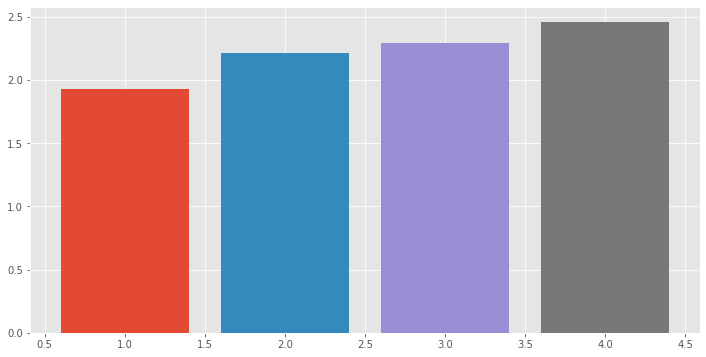

In [47]:
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.bar(1,np.mean(list(drythirtysixvalues)))
ax.bar(2,np.mean(list(fourhourswetvalues)))
ax.bar(3,np.mean(list(wetthirtysixvalues)))
ax.bar(4,np.mean(list(fourOonehourswetvalues)))

In [48]:
df = welch_satterhwaithe_df(list(drythirtysixvalues),list(wetthirtysixvalues))
test_stat = welch_test_statistic(list(drythirtysixvalues),list(wetthirtysixvalues))
students = stats.t(df)
pvalue = students.cdf(test_stat)
pvalue

0.0050560875546973539

In [49]:
df2 = welch_satterhwaithe_df(list(fourhourswetvalues),list(wetthirtysixvalues))
test_stat2 = welch_test_statistic(list(fourhourswetvalues),list(wetthirtysixvalues))
students2 = stats.t(df2)
pvalue2 = students2.cdf(test_stat2)
pvalue2

0.27968192745496578

In [50]:
df3 = welch_satterhwaithe_df(list(fourhourswetvalues),list(drythirtysixvalues))
test_stat3 = welch_test_statistic(list(fourhourswetvalues),list(drythirtysixvalues))
students3 = stats.t(df3)
pvalue3 = 1-students3.cdf(test_stat3)
pvalue3

0.006816667177153346

In [51]:
df7 = welch_satterhwaithe_df(list(fourhourswetvalues),list(fourOonehourswetvalues))
test_stat7 = welch_test_statistic(list(fourhourswetvalues),list(fourOonehourswetvalues))
students7 = stats.t(df7)
pvalue7 = students7.cdf(test_stat7)
pvalue7

0.1007515469418659

In [52]:
def getaccidentsperhour(df):
    dic=dict()
    df = df[df['INCDTTM'].dt.time != datetime.time(0,0)]
    for i in range(24):
        if i == 23:
            hourly = df[(df['INCDTTM'].dt.time >= datetime.time(i,0)) &
                        (df['INCDTTM'].dt.time <= datetime.time(23,59))].shape[0]
            dic[i]=hourly
        else:
            hourly = df[(df['INCDTTM'].dt.time >= datetime.time(i,0)) &
                        (df['INCDTTM'].dt.time < datetime.time(i+1,0))].shape[0]
            dic[i]=hourly
    return dic

In [53]:
hourlyaccidents = getaccidentsperhour(file2)
hourlyaccidents

{0: 3828,
 1: 3410,
 2: 3579,
 3: 1638,
 4: 1195,
 5: 1626,
 6: 3152,
 7: 6364,
 8: 8303,
 9: 7824,
 10: 7257,
 11: 7992,
 12: 10117,
 13: 9995,
 14: 10395,
 15: 11296,
 16: 11916,
 17: 12726,
 18: 9590,
 19: 7097,
 20: 6105,
 21: 5497,
 22: 5353,
 23: 4564}